#Proyecto Final Minería de Datos

### Camilo Velásquez Hincapié
### Tomás Cardona Montoya
### Andrés Arias Medina

#Modelos Predictivos

#Dataset: Cancer Data (datos_preparados)

#Variable objetivo: diagnosis (Benigno (B) o Maligno (M))

In [446]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Lectura de datos (CSV)

In [448]:
#Cargamos los datos
data = pd.read_csv("datos_preparados.csv", sep=',')
data.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,smoothness_se,compactness_se,concave points_se,symmetry_worst,diagnosis_M
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.006399,0.04904,0.01587,0.4601,1
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.005225,0.01308,0.01340,0.2750,1
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.006150,0.04006,0.02058,0.3613,1
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,0.009110,0.07458,0.01867,0.6638,1
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.011490,0.02461,0.01885,0.2364,1


In [445]:
data

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,smoothness_se,compactness_se,concave points_se,symmetry_worst,diagnosis_M
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.006399,0.04904,0.01587,0.4601,1
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.005225,0.01308,0.01340,0.2750,1
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.006150,0.04006,0.02058,0.3613,1
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,0.009110,0.07458,0.01867,0.6638,1
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.011490,0.02461,0.01885,0.2364,1
...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,0.010300,0.02891,0.02454,0.2060,1
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,0.005769,0.02423,0.01678,0.2572,1
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,0.005903,0.03731,0.01557,0.2218,1
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,0.006522,0.06158,0.01664,0.4087,1


In [389]:
#Conocemos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             569 non-null    float64
 1   texture_mean            569 non-null    float64
 2   smoothness_mean         569 non-null    float64
 3   compactness_mean        569 non-null    float64
 4   symmetry_mean           569 non-null    float64
 5   fractal_dimension_mean  569 non-null    float64
 6   radius_se               569 non-null    float64
 7   smoothness_se           569 non-null    float64
 8   compactness_se          569 non-null    float64
 9   concave points_se       569 non-null    float64
 10  symmetry_worst          569 non-null    float64
 11  diagnosis_M             569 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 53.5 KB


División de datos (criterio 70-30) 
* Los modelos se realizarán sobre el 70% de prueba

<Axes: >

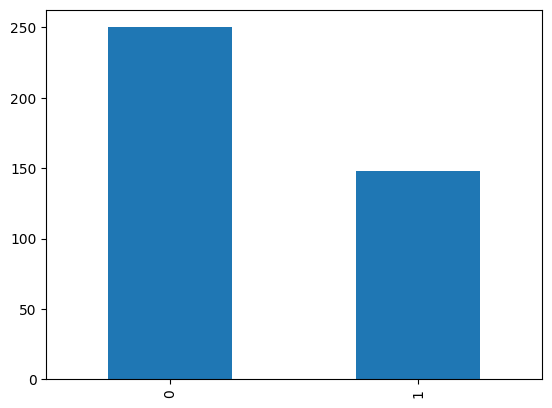

In [390]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("diagnosis_M", axis = 1) # Variables predictoras
Y = data['diagnosis_M'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')

<Axes: >

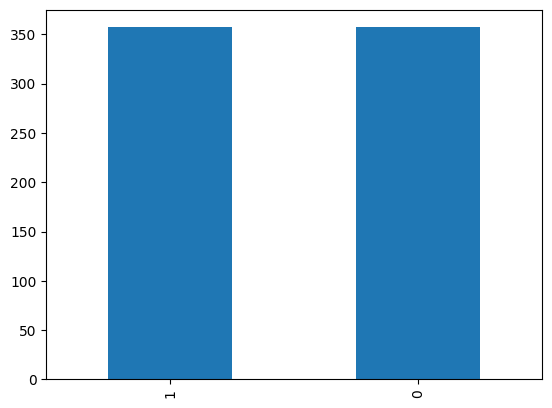

In [391]:
#Balanceo con el 70% de los datos
from imblearn.over_sampling import SMOTE


smote = SMOTE()
X_train, Y_train = smote.fit_resample(X, Y)
Y_train.value_counts().plot(kind='bar')

Validación cruzada

1: Maligno
2: Benigno

# Modelos: 

Árboles de clasificación, KNN, Redes neuronales, Regresión logística, Random Forest, Boosting y Bagging.

Con sus cuatro medidas de evaluación: precision, recall, accuracy y curva ROC

In [392]:
#Método de ML a usar en la validación cruzada
from sklearn import tree
modelTree = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=200, max_depth=None)
 
#Validación Cruzada: division, aprendizaje, evaluacion
from sklearn.model_selection import cross_validate
scores = cross_validate(modelTree, X_train, Y_train, cv=10, scoring=('accuracy','precision', 'recall'), return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_accuracy,test_precision,test_recall
0,0.005389,0.009493,0.819444,1.000000,0.638889
1,0.004459,0.006077,0.763889,0.913043,0.583333
2,0.003533,0.004894,0.819444,0.925926,0.694444
3,0.003269,0.004778,0.944444,1.000000,0.888889
4,0.003667,0.005358,0.943662,1.000000,0.888889
5,0.003347,0.004839,0.873239,0.909091,0.833333
6,0.003369,0.004871,0.830986,0.961538,0.694444
7,0.003208,0.004733,0.901408,1.000000,0.800000
8,0.003264,0.004791,0.830986,0.870968,0.771429
9,0.003217,0.004902,0.901408,1.000000,0.800000


In [393]:
# Promedios
medidas = pd.DataFrame([])
medidas['Tree']=scores.mean()
#scores.mean()
medidas

,Tree
fit_time,0.003672
score_time,0.005474
test_accuracy,0.862891
test_precision,0.958057
test_recall,0.759365


In [394]:
#Modelo Final con todos los datos
modelTree.fit(X, Y) #100%

DecisionTreeClassifier(min_samples_leaf=200)

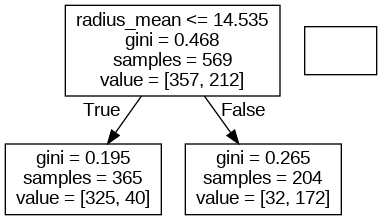

In [395]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(modelTree, out_file=None, feature_names=X.columns)

# Crear el gráfico a partir del archivo .dot
graph = pydotplus.graph_from_dot_data(dot_data)

# Mostrar el gráfico
Image(graph.create_png())

In [396]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler
 
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_worst']]) #Ajuste de los parametros: max - min
 
#Se aplica la normalización
X_train[['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_worst']]= min_max_scaler.transform(X_train[['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_worst']])
X_test[['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_worst']]= min_max_scaler.transform(X_test[['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_worst']])  #30%
X_train.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,smoothness_se,compactness_se,concave points_se,symmetry_worst
0,0.521037,0.022658,0.593753,0.792037,0.686364,0.605518,0.356147,0.159296,0.351398,0.300625,0.598462
1,0.643144,0.272574,0.289880,0.181768,0.379798,0.141323,0.156437,0.119387,0.081323,0.253836,0.233590
2,0.601496,0.390260,0.514309,0.431017,0.509596,0.211247,0.229622,0.150831,0.283955,0.389847,0.403706
3,0.210090,0.360839,0.811321,0.811361,0.776263,1.000000,0.139091,0.251453,0.543215,0.353665,1.000000
4,0.629893,0.156578,0.430351,0.347893,0.378283,0.186816,0.233822,0.332359,0.167918,0.357075,0.157500


In [397]:
#Aprendizaje KNN
from sklearn.neighbors  import KNeighborsClassifier 
modelKnn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')#euclidean, minkowski

#Validación Cruzada: division, aprendizaje, evaluacion
from sklearn.model_selection import cross_validate
scores = cross_validate(modelKnn, X_train, Y_train, cv=10, scoring=('accuracy','precision', 'recall'), return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_accuracy,test_precision,test_recall
0,0.007804,0.013566,0.930556,0.897436,0.972222
1,0.004080,0.009004,0.902778,0.871795,0.944444
2,0.003073,0.007909,0.930556,0.897436,0.972222
3,0.002923,0.007794,0.930556,0.969697,0.888889
4,0.002881,0.011106,0.943662,0.944444,0.944444
5,0.002961,0.007613,0.901408,0.871795,0.944444
6,0.002921,0.007535,0.971831,0.947368,1.000000
7,0.002872,0.007565,0.957746,0.944444,0.971429
8,0.003088,0.007571,0.901408,0.833333,1.000000
9,0.002842,0.007795,0.915493,0.891892,0.942857


In [398]:
#Modelo Final con todos los datos
modelKnn.fit(X, Y) #100%

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [399]:
# Promedios
medidas['KNN']=scores.mean()
medidas

,Tree,KNN
fit_time,0.003672,0.003545
score_time,0.005474,0.008746
test_accuracy,0.862891,0.928599
test_precision,0.958057,0.906964
test_recall,0.759365,0.958095


In [412]:
#Red Neuronal
from sklearn.neural_network import MLPClassifier
modelNN = MLPClassifier(activation="logistic",hidden_layer_sizes=(5), learning_rate='constant',
                     learning_rate_init=0.2, momentum= 0.3, max_iter=5000, random_state=3)

#Validación Cruzada: division, aprendizaje, evaluacion
from sklearn.model_selection import cross_validate
scores = cross_validate(modelNN, X_train, Y_train, cv=10, scoring=('accuracy','precision', 'recall'), return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_accuracy,test_precision,test_recall
0,0.096259,0.005960,0.958333,0.923077,1.000000
1,0.075156,0.007522,0.930556,0.969697,0.888889
2,0.087946,0.006066,0.958333,0.945946,0.972222
3,0.052097,0.005236,0.972222,1.000000,0.944444
4,0.098562,0.006181,0.971831,1.000000,0.944444
5,0.082421,0.006224,0.929577,0.918919,0.944444
6,0.079510,0.006029,0.943662,0.970588,0.916667
7,0.080316,0.005257,0.957746,0.944444,0.971429
8,0.075791,0.005473,0.943662,0.969697,0.914286
9,0.092539,0.005534,0.887324,0.846154,0.942857


In [413]:
#Modelo Final con todos los datos
modelNN.fit(X, Y) #100%

MLPClassifier(activation='logistic', hidden_layer_sizes=5,
              learning_rate_init=0.2, max_iter=5000, momentum=0.3,
              random_state=3)

In [414]:
# Promedios
medidas['NN']=scores.mean()
medidas

,Tree,KNN,NN,Reg Log,R. Forest
fit_time,0.003672,0.003545,0.082060,0.006296,0.269843
score_time,0.005474,0.008746,0.005948,0.008541,0.016500
test_accuracy,0.862891,0.928599,0.945325,0.929969,0.945383
test_precision,0.958057,0.906964,0.948852,0.951016,0.947070
test_recall,0.759365,0.958095,0.943968,0.907540,0.944048


In [403]:
# Regresión Logística
from sklearn.linear_model import LogisticRegression
modelLOG = LogisticRegression(solver='liblinear', multi_class='auto')

#Validación Cruzada: division, aprendizaje, evaluacion
from sklearn.model_selection import cross_validate
scores = cross_validate(modelLOG, X_train, Y_train, cv=10, scoring=('accuracy','precision', 'recall'), return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_accuracy,test_precision,test_recall
0,0.011676,0.010153,0.944444,0.944444,0.944444
1,0.005328,0.008704,0.875000,0.935484,0.805556
2,0.006108,0.007958,0.916667,0.941176,0.888889
3,0.005979,0.008050,0.986111,1.000000,0.972222
4,0.005285,0.007869,0.957746,0.971429,0.944444
5,0.005942,0.007987,0.943662,0.970588,0.916667
6,0.005379,0.007657,0.915493,0.941176,0.888889
7,0.005718,0.009119,0.943662,0.969697,0.914286
8,0.006026,0.008766,0.915493,0.967742,0.857143
9,0.005517,0.009147,0.901408,0.868421,0.942857


In [404]:
#Modelo Final con todos los datos
modelLOG.fit(X, Y) #100%

LogisticRegression(solver='liblinear')

In [405]:
# Promedios
medidas['Reg Log']=scores.mean()
medidas

,Tree,KNN,NN,Reg Log
fit_time,0.003672,0.003545,0.080698,0.006296
score_time,0.005474,0.008746,0.005715,0.008541
test_accuracy,0.862891,0.928599,0.945325,0.929969
test_precision,0.958057,0.906964,0.948852,0.951016
test_recall,0.759365,0.958095,0.943968,0.907540


In [415]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
modelrf= RandomForestClassifier(n_estimators=100,  max_samples=0.7, criterion='gini',
                              max_depth=None, min_samples_leaf=2)

#Validación Cruzada: division, aprendizaje, evaluacion
from sklearn.model_selection import cross_validate
scores = cross_validate(modelrf, X_train, Y_train, cv=10, scoring=('accuracy','precision', 'recall'), return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_accuracy,test_precision,test_recall
0,0.248341,0.016016,0.930556,0.942857,0.916667
1,0.248561,0.018777,0.888889,0.911765,0.861111
2,0.251831,0.016357,0.930556,0.942857,0.916667
3,0.244726,0.016249,0.986111,1.000000,0.972222
4,0.227880,0.014744,0.957746,0.971429,0.944444
5,0.234853,0.016372,0.929577,0.942857,0.916667
6,0.238395,0.022297,0.943662,0.944444,0.944444
7,0.240794,0.020617,0.985915,1.000000,0.971429
8,0.231310,0.015076,0.943662,0.918919,0.971429
9,0.253565,0.015281,0.929577,0.916667,0.942857


In [416]:
#Modelo Final con todos los datos
modelrf.fit(X, Y) #100%

RandomForestClassifier(max_samples=0.7, min_samples_leaf=2)

In [417]:
# Promedios
medidas['R. Forest']=scores.mean()
medidas

,Tree,KNN,NN,Reg Log,R. Forest
fit_time,0.003672,0.003545,0.082060,0.006296,0.242025
score_time,0.005474,0.008746,0.005948,0.008541,0.017179
test_accuracy,0.862891,0.928599,0.945325,0.929969,0.942625
test_precision,0.958057,0.906964,0.948852,0.951016,0.949179
test_recall,0.759365,0.958095,0.943968,0.907540,0.935794


In [418]:
#Boosting
from sklearn.ensemble import AdaBoostClassifier
modelo_base=tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=2)
modelboos = AdaBoostClassifier(modelo_base, n_estimators=50)

#Validación Cruzada: division, aprendizaje, evaluacion
from sklearn.model_selection import cross_validate
scores = cross_validate(modelboos, X_train, Y_train, cv=10, scoring=('accuracy','precision', 'recall'), return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_accuracy,test_precision,test_recall
0,0.437048,0.014942,0.958333,0.923077,1.000000
1,0.422382,0.013738,0.916667,0.941176,0.888889
2,0.420731,0.016245,0.944444,0.944444,0.944444
3,0.430359,0.016303,0.986111,1.000000,0.972222
4,0.485515,0.021344,0.957746,0.971429,0.944444
5,0.567016,0.021685,0.985915,1.000000,0.972222
6,0.569099,0.024276,0.985915,0.972973,1.000000
7,0.546176,0.023462,0.985915,0.972222,1.000000
8,0.578070,0.020344,0.957746,0.944444,0.971429
9,0.512884,0.014407,0.943662,0.897436,1.000000


In [419]:
#Modelo Final con todos los datos
modelboos.fit(X, Y) #100%

AdaBoostClassifier(estimator=DecisionTreeClassifier(min_samples_leaf=2))

In [420]:
# Promedios
medidas['Boosting']=scores.mean()
medidas

,Tree,KNN,NN,Reg Log,R. Forest,Boosting
fit_time,0.003672,0.003545,0.082060,0.006296,0.242025,0.496928
score_time,0.005474,0.008746,0.005948,0.008541,0.017179,0.018674
test_accuracy,0.862891,0.928599,0.945325,0.929969,0.942625,0.962246
test_precision,0.958057,0.906964,0.948852,0.951016,0.949179,0.956720
test_recall,0.759365,0.958095,0.943968,0.907540,0.935794,0.969365


In [433]:
#Bagging: Knn
from sklearn.ensemble import BaggingClassifier
modelo_base=KNeighborsClassifier(n_neighbors=1, metric='euclidean')
modelbag = BaggingClassifier(modelo_base, n_estimators=10, max_samples=0.6)

#Validación Cruzada: division, aprendizaje, evaluacion
from sklearn.model_selection import cross_validate
scores = cross_validate(modelbag, X_train, Y_train, cv=10, scoring=('accuracy','precision', 'recall'), return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_accuracy,test_precision,test_recall
0,0.045057,0.025549,0.930556,0.897436,0.972222
1,0.028955,0.029069,0.902778,0.891892,0.916667
2,0.034832,0.022559,0.916667,0.894737,0.944444
3,0.042408,0.022680,0.958333,1.000000,0.916667
4,0.030147,0.024548,0.943662,0.944444,0.944444
5,0.030006,0.024575,0.943662,0.921053,0.972222
6,0.031833,0.024996,0.985915,0.972973,1.000000
7,0.027579,0.023555,0.971831,0.971429,0.971429
8,0.027815,0.023669,0.901408,0.833333,1.000000
9,0.030679,0.023417,0.915493,0.891892,0.942857


In [434]:
#Modelo Final con todos los datos
modelbag.fit(X, Y) #100%

BaggingClassifier(estimator=KNeighborsClassifier(metric='euclidean',
                                                 n_neighbors=1),
                  max_samples=0.6)

In [435]:
# Promedios
medidas['Bagging']=scores.mean()
medidas

,Tree,KNN,NN,Reg Log,R. Forest,Boosting,Bagging
fit_time,0.003672,0.003545,0.082060,0.006296,0.242025,0.496928,0.032931
score_time,0.005474,0.008746,0.005948,0.008541,0.017179,0.018674,0.024462
test_accuracy,0.862891,0.928599,0.945325,0.929969,0.942625,0.962246,0.937031
test_precision,0.958057,0.906964,0.948852,0.951016,0.949179,0.956720,0.921919
test_recall,0.759365,0.958095,0.943968,0.907540,0.935794,0.969365,0.958095


# Hiperparametrización
Se seleccionan los 3 mejores modelos, en este caso nos basamos principalmente en recall, pues nuestro objetivo en este proyecto es reducir los falsos negativos (pacientes que se les dijo que el tumor NO era maligno, cuando en realidad si lo era), según la matriz, los modelos con mejor recall son: Boosting, Red neuronal y KNN

In [436]:
from sklearn.model_selection import GridSearchCV
#KNN
from sklearn.neighbors  import KNeighborsClassifier 
modelKnn = KNeighborsClassifier()
 
# Definir los hiperparametros
n_neighbors=[1,3,5,7,13]
metric=['euclidean','minkowski']

 
#Grid
param_grid = dict(n_neighbors=n_neighbors, metric=metric)
grid = GridSearchCV(estimator=modelKnn, param_grid=param_grid, scoring='recall', n_jobs=-1,cv=10)
grid.fit(X_train, Y_train) #70%

#Mejor modelo
modelKnn= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidasHip= pd.DataFrame(index=['recall de la hiperp.'])
medidasHip['Knn']=grid.best_score_
 
 
# Mejores párametros
print( grid.best_params_)
print(medidasHip)

{'metric': 'euclidean', 'n_neighbors': 3}
                           Knn
recall de la hiperp.  0.963651


In [437]:
#Red Neuronal
 
from sklearn.neural_network import MLPClassifier
modelNN = MLPClassifier()
 
# Definir los parametros
random_state=[1] #Semilla para generar número pseudoaleatorios
solver=['sgd'] # Regla de aprendizaje ['adam','sgd','lbfgs']
learning_rate=['constant','adaptive'] #tasa de aprendizaje
learning_rate_init=[0.2, 0.5, 1.0] #valor tasa de aprendizaje
momentum=[0.3, 0.5, 1.0] #momentum
activation=['identity','logistic', 'relu'] #'identity’, ‘logistic’, ‘tanh’, ‘relu’
hidden_layer_sizes=[4, 20,100] # neuronas de la capa oculta (input+output/2)
max_iter = [100, 200] #iteraciones
 
#Grid
param_grid = dict(random_state=random_state,solver=solver,activation=activation, hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, learning_rate=learning_rate,
                  learning_rate_init=learning_rate_init, momentum=momentum)
grid = GridSearchCV(estimator=modelNN, param_grid=param_grid, scoring='recall', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)
 
#Mejor modelo
modelNN= grid.best_estimator_
 
#Medida de evaluación del mejor modelo
medidasHip['NN']=grid.best_score_
 
# Mejores párametros
print( grid.best_params_)
print(medidasHip)

{'activation': 'relu', 'hidden_layer_sizes': 4, 'learning_rate': 'constant', 'learning_rate_init': 0.5, 'max_iter': 100, 'momentum': 0.3, 'random_state': 1, 'solver': 'sgd'}
                           Knn        NN
recall de la hiperp.  0.963651  0.974841


In [438]:
# Boosting

from sklearn.ensemble import AdaBoostClassifier
model_boost = AdaBoostClassifier()

#Definir los hiperparámetros
base_Tree = tree.DecisionTreeClassifier()
base_Tree2= tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=2)
base_Tree3 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=200, max_depth=None)
base_estimator = [base_Tree, base_Tree2, base_Tree3]
n_estimators = [50,60]
learning_rate= [0.5,0.7]

#Grid
param_grid = dict(base_estimator=base_estimator ,n_estimators = n_estimators,learning_rate=learning_rate)
grid = GridSearchCV(estimator=model_boost, param_grid=param_grid, scoring='recall', n_jobs=-1, cv=3)
grid.fit(X_train, Y_train)

#Mejor modelo
model_boost= grid.best_estimator_
 
#Medida de evaluación del mejor modelo
medidasHip['Boosting']=grid.best_score_
 
# Mejores párametros
print( grid.best_params_)
print(medidasHip)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'base_estimator': DecisionTreeClassifier(min_samples_leaf=2), 'learning_rate': 0.7, 'n_estimators': 60}
                           Knn        NN  Boosting
recall de la hiperp.  0.963651  0.974841  0.971989


              precision    recall  f1-score   support

           0       0.98      0.94      0.96       107
           1       0.91      0.97      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



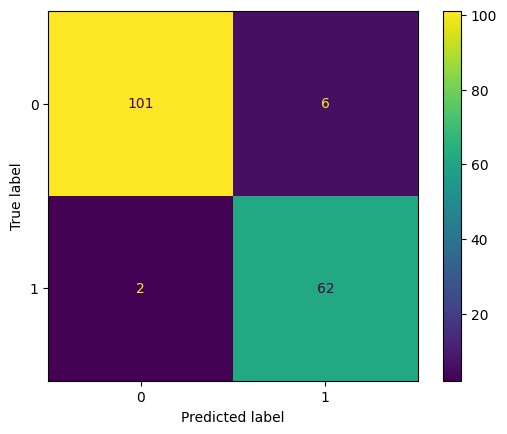

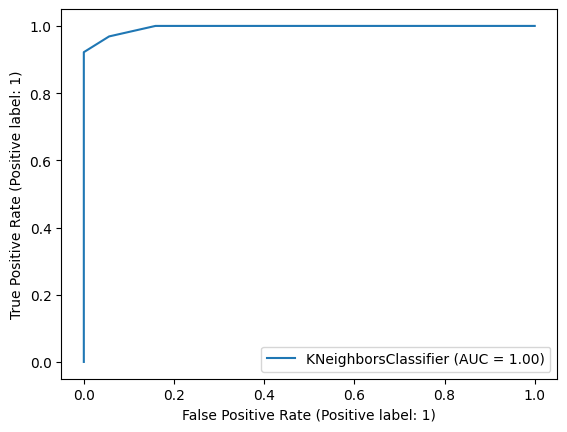

In [439]:
#Evaluación del mejor Knn con el 30%
from sklearn import metrics
 
Y_pred = modelKnn.predict(X_test)
 
#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
 
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred))
 
# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelKnn,X_test, Y_test)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.92      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



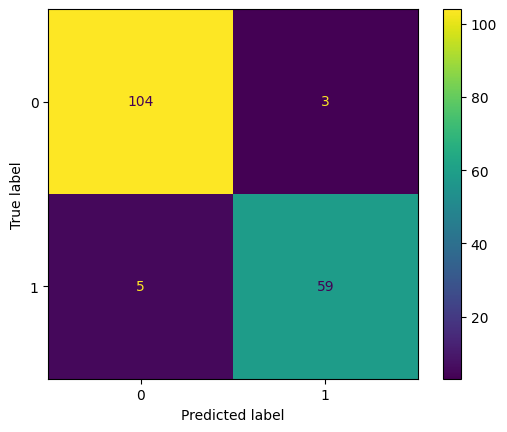

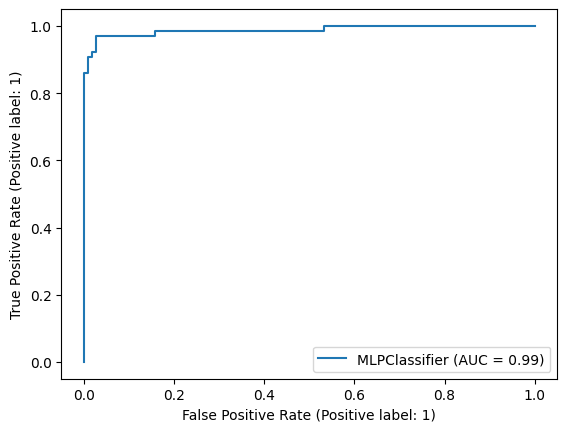

In [440]:
#Evaluación de Red Neuronal
from sklearn import metrics
 
Y_pred = modelNN.predict(X_test)
 
#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
 
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred))
 
# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelNN,X_test, Y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        64

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



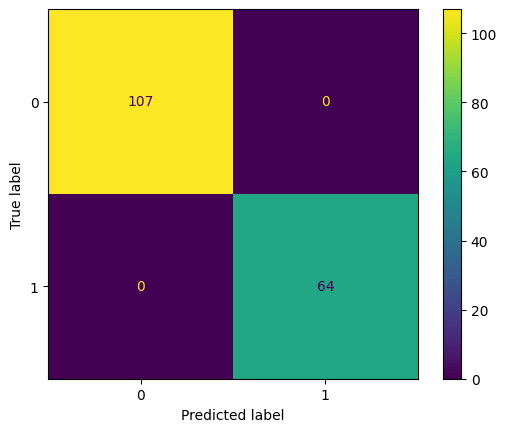

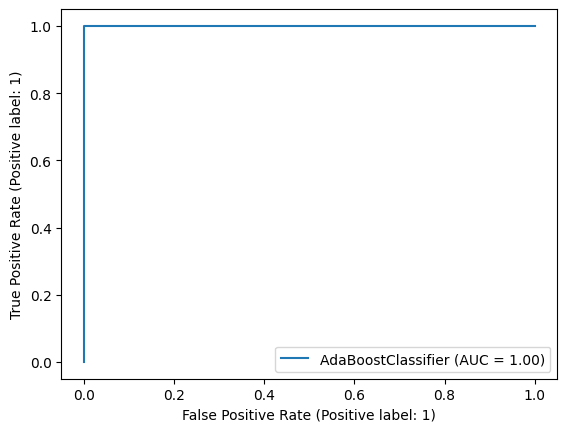

In [441]:
#Evaluación de Boosting
from sklearn import metrics
 
Y_pred = model_boost.predict(X_test)
 
#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
 
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred))
 
# Curva ROC
metrics.RocCurveDisplay.from_estimator(model_boost,X_test, Y_test)

In [444]:
import pickle
filename = 'modelo-NN.pkl'
variables= X.columns._values
pickle.dump([modelNN,variables,min_max_scaler], open(filename, 'wb')) #write